In [1]:
# Listing of the modelling using linear regression I:

In [2]:
# linear regression model
from numpy.random import rand
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# linear regression
def predict_row(row, coefficients):
    # add the bias, the last coefficient
    result = coefficients[-1]
    # add the weighted input
    for i in range(len(row)):
        result += coefficients[i] * row[i]
    return result

In [3]:
# use model coefficients to generate predictions for a dataset of rows
def predict_dataset(X, coefficients):
    yhats = list()
    for row in X:
        # make a prediction
        yhat = predict_row(row, coefficients)
        # store the prediction
        yhats.append(yhat)
    return yhats

In [4]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=2, 
noise=0.2, random_state=1)
# determine the number of coefficients
n_coeff = X.shape[1] + 1
# generate random coefficients
coefficients = rand(n_coeff)
# generate predictions for dataset
yhat = predict_dataset(X, coefficients)
# calculate model prediction error
score = mean_squared_error(y, yhat)
print('MSE: %f' % score)

MSE: 7258.894833


In [5]:
# Listing of the modelling using linear regression II:

In [6]:
# linear regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

In [7]:
# prepare the dataset
def get_dataset():
    X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, 
effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
    # add some artificial outliers
    seed(1)
    for i in range(10):
        factor = randint(2, 4)
        if random() > 0.5:
            X[i] += factor * X.std()
        else:
            X[i] -= factor * X.std()
    return X, y

In [8]:
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, 
scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)

In [9]:
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
    # fut the model on all data
    model.fit(X, y)
    # plot the dataset
    pyplot.scatter(X, y)
    # plot the line of best fit
    xaxis = arange(X.min(), X.max(), 0.01)
    yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
    pyplot.plot(xaxis, yaxis, color='r')
    # show the plot
    pyplot.title(type(model).__name__)
    pyplot.show()

Mean MAE: 5.260 (1.149)


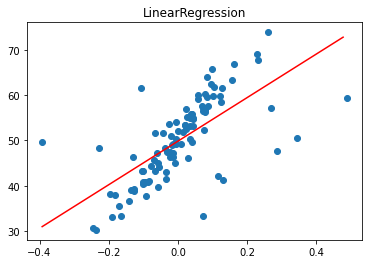

In [10]:
# load dataset
X, y = get_dataset()
# define the model
model = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)